BANK LOAN REPAYMENT APPROVALS WITH CLASSIFICATION ALGORITHMS

This project aims to predict bank loan repayment. We are going to firstly perform an EDA and then use classification algorithms such as Logistic Regression and Random Forest to build a prediction model. Finally we will set a data visualization application with Sreamlit to provide interactive insights. We will use a database of loan applicants. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Data importation
data = pd.read_csv('loan_data.csv')
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
#Dataset structure and missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
print('Missing data in each column:')
print(data.isnull().sum())

# Checking unique values for categorical variables to ensure proper data types
categorical_vars = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for col in categorical_vars:
    print(f"Unique values in {col}: {data[col].unique()}")

Missing data in each column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Unique values in person_gender: ['female' 'male']
Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in previous_loan_defaults_on_file: ['No' 'Yes']


Exploratory Data Analysis

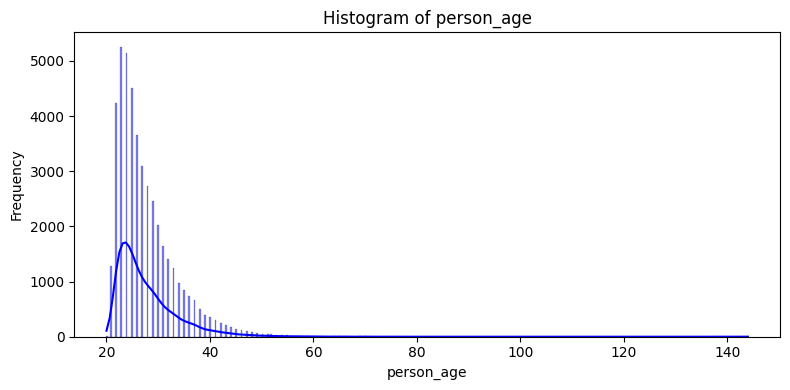

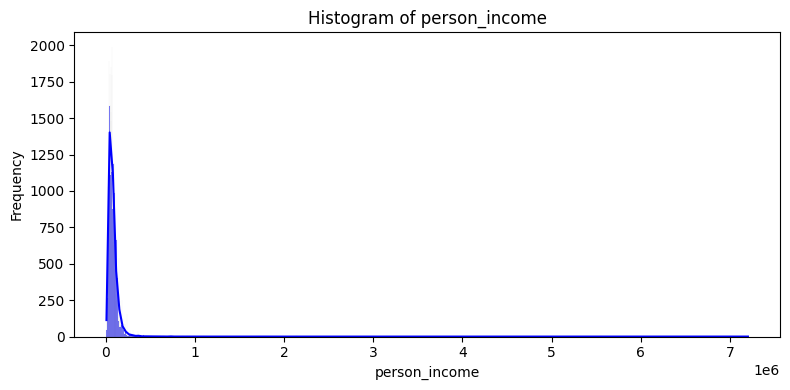

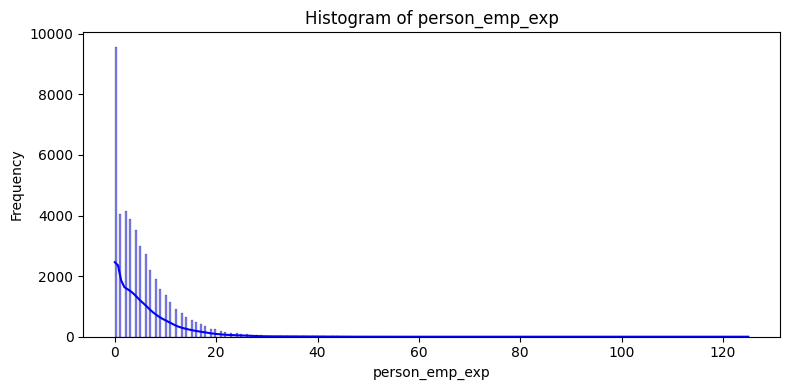

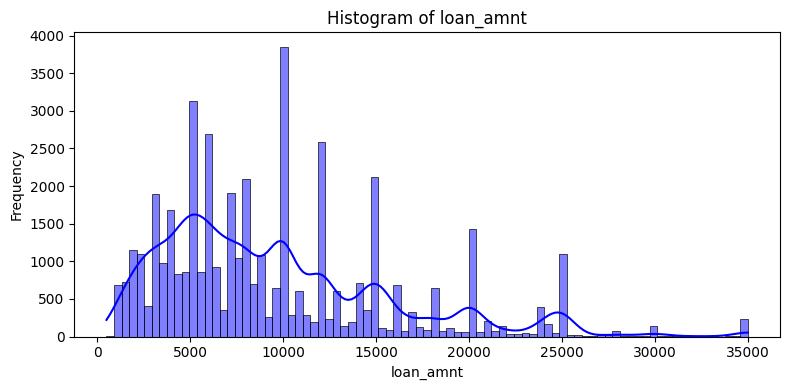

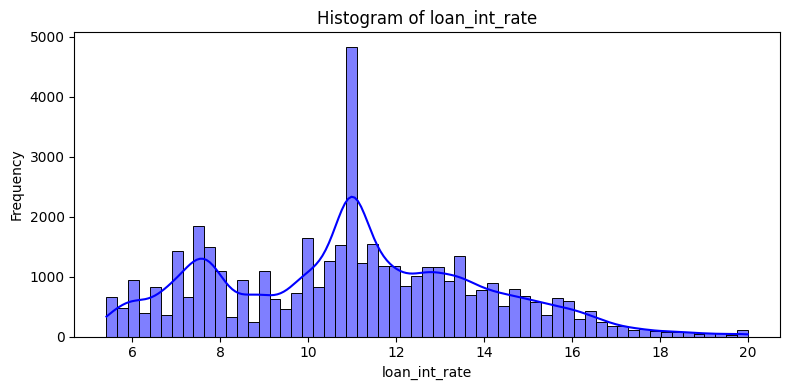

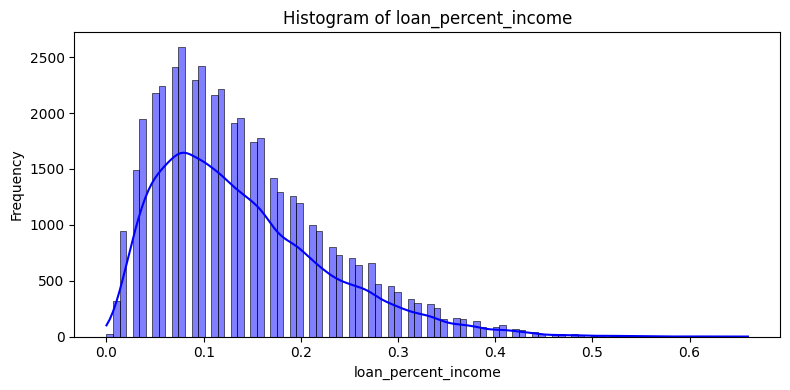

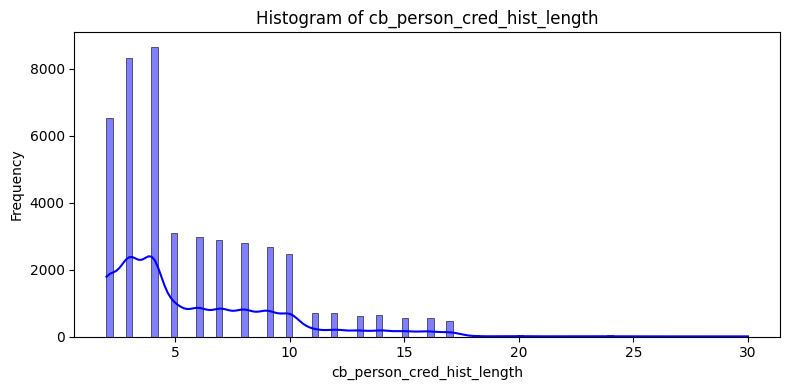

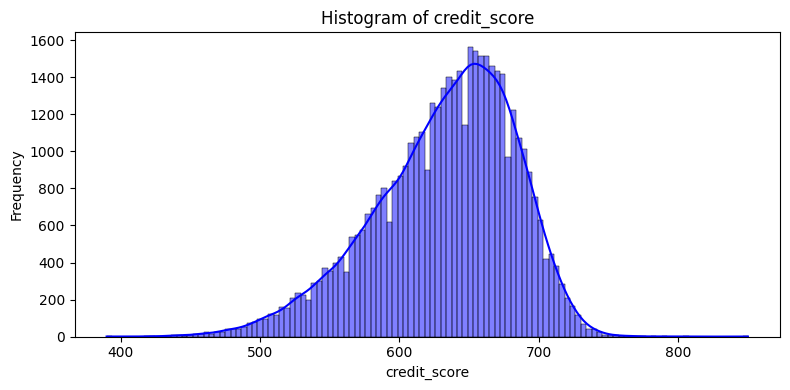

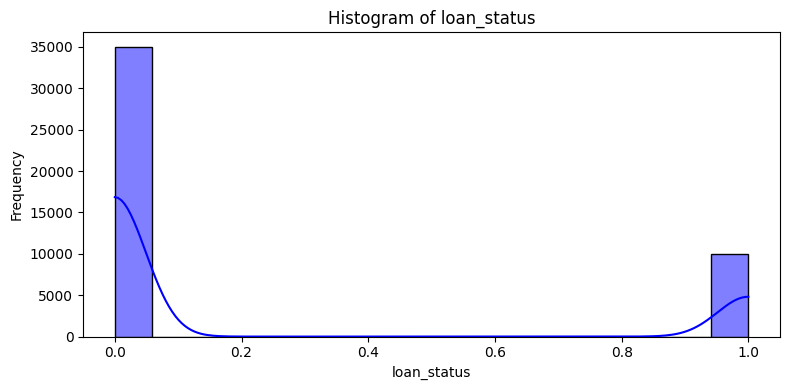

C:\Users\SAWADOGO\AppData\Local\Temp\ipykernel_1428\4281620279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=var, palette='Set2')


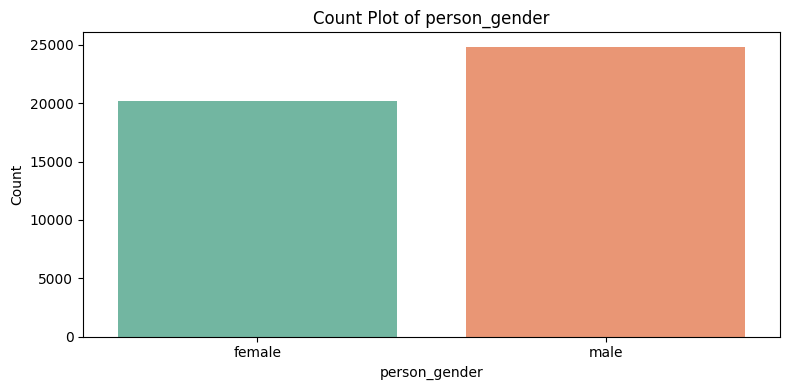

C:\Users\SAWADOGO\AppData\Local\Temp\ipykernel_1428\4281620279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=var, palette='Set2')


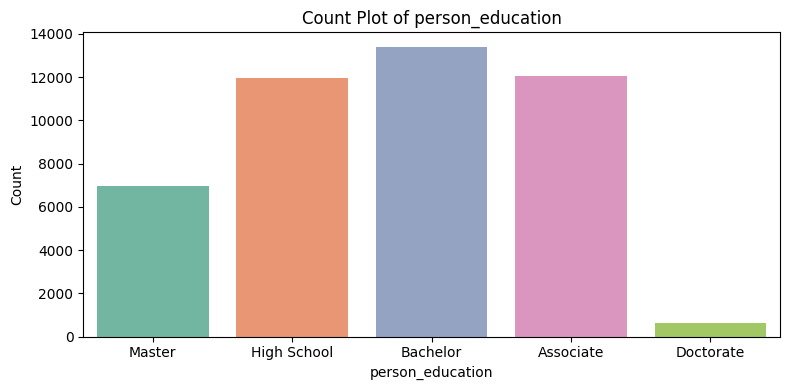

C:\Users\SAWADOGO\AppData\Local\Temp\ipykernel_1428\4281620279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=var, palette='Set2')


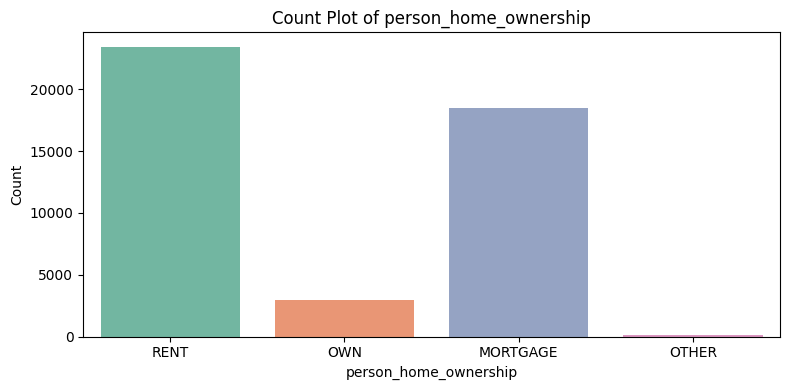

C:\Users\SAWADOGO\AppData\Local\Temp\ipykernel_1428\4281620279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=var, palette='Set2')


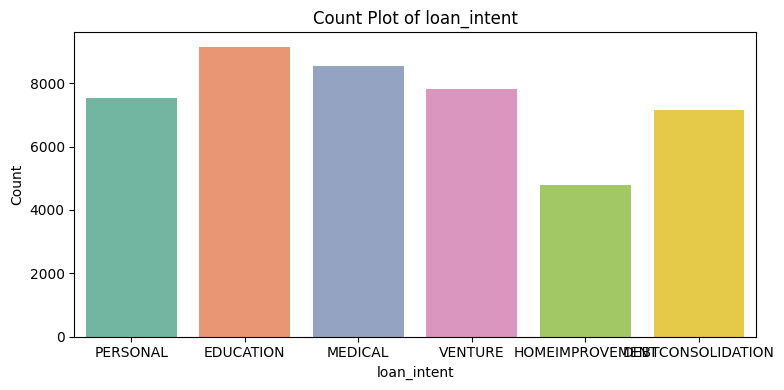

C:\Users\SAWADOGO\AppData\Local\Temp\ipykernel_1428\4281620279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=var, palette='Set2')


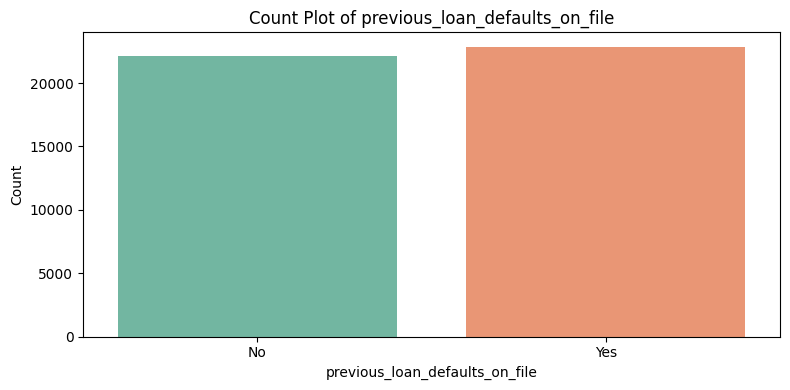

In [5]:
#Histograms for numeric variables
numeric_vars = data.select_dtypes(include=['number']).columns.tolist()
for var in numeric_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(data[var], kde= True, color='blue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
#count plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data = data, x=var, palette='Set2')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

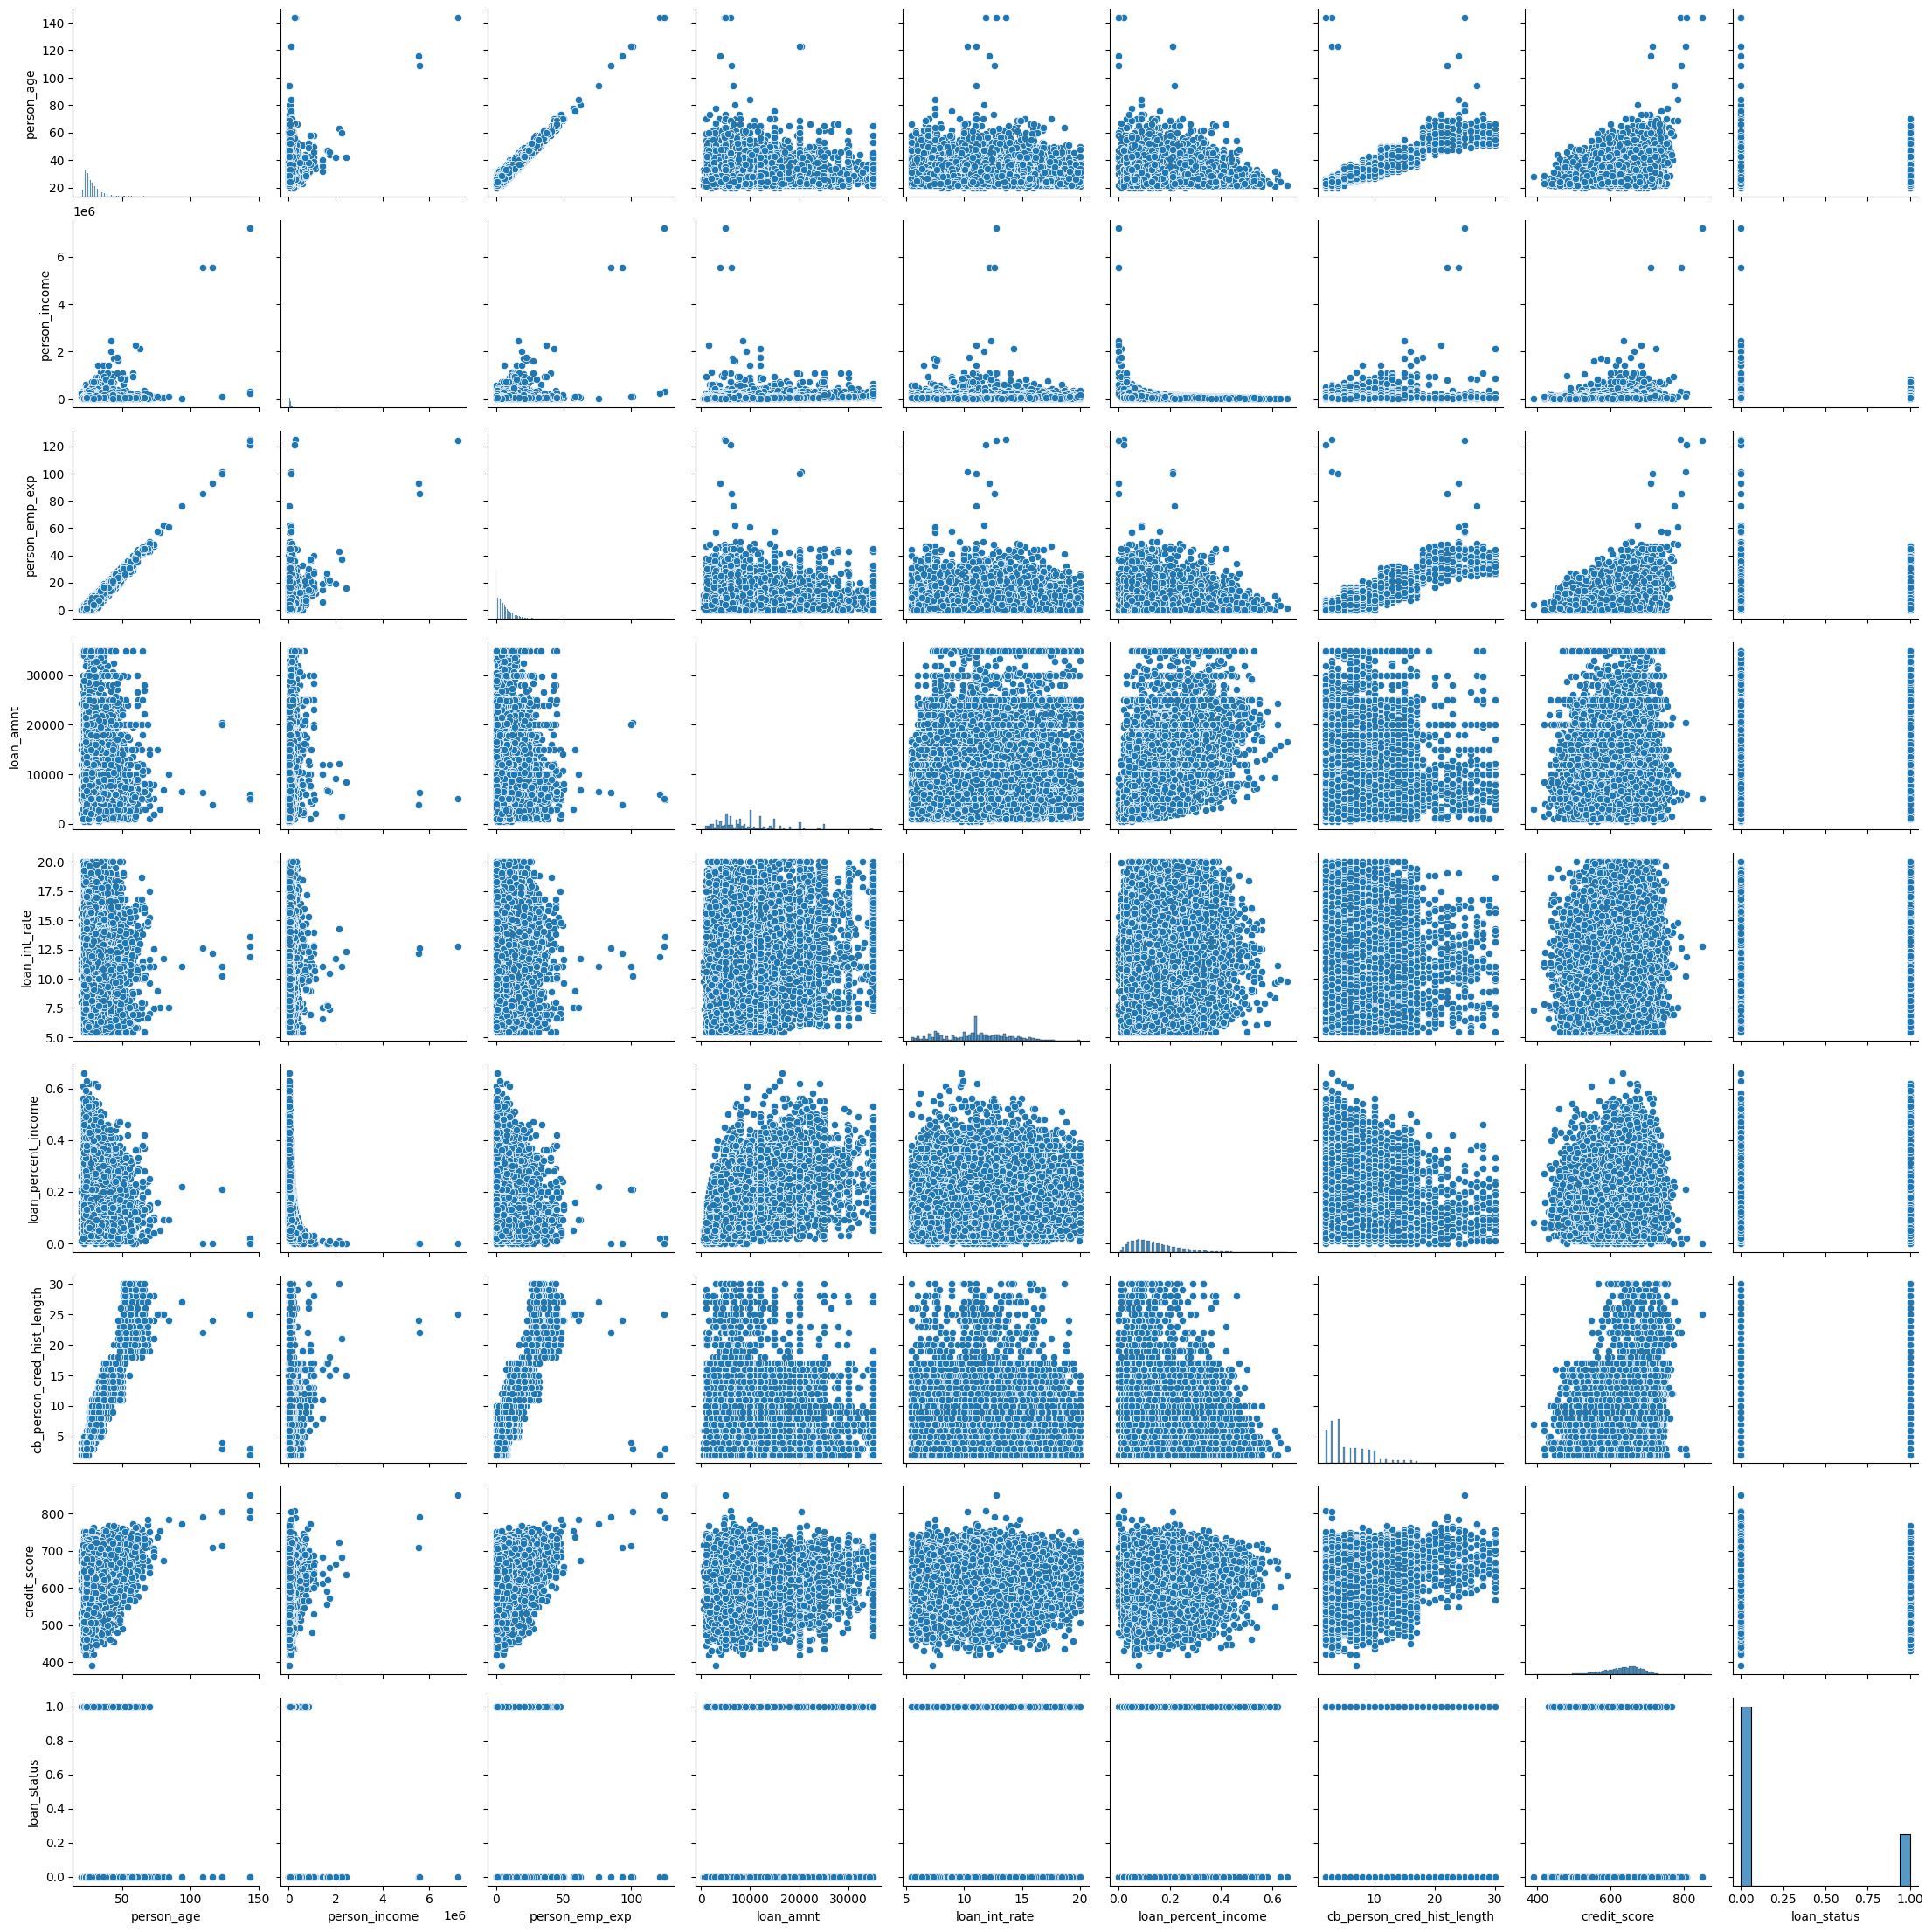

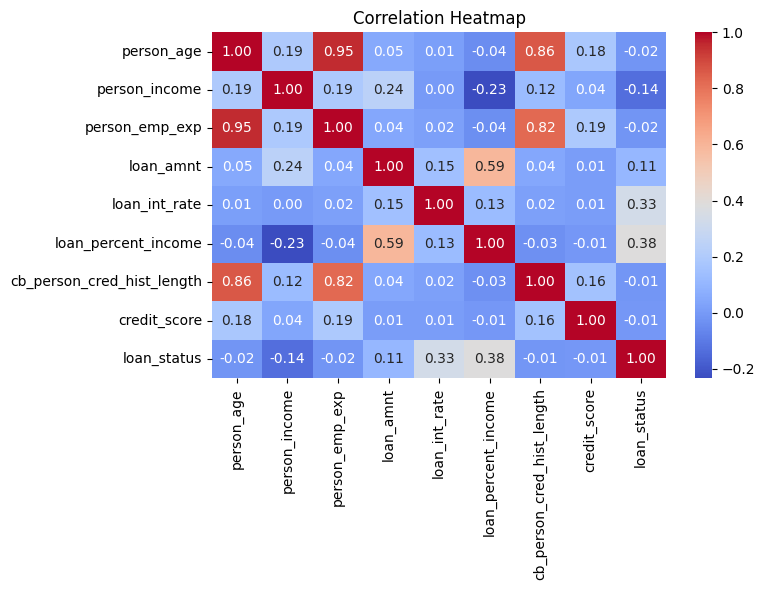

In [6]:
#Pair plot of numerical variables
sns.pairplot(data[numeric_vars], kind='scatter')
plt.show()

#Heatmap correlation 
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

From the EDA, we see that there is correlation between age with employment experience and age with credit history length. There is also a correlation between employment experience and credit history length. These correlation are logical and not surprising, therefore, there is not strong correlation in overall, we can do a logistic regression. 
In order our hypothesis of no strong correlation correlation is false, we will do another classification algorithm: Random Forest. 
And finally we will evaluate each model with accuracy score, confusion matrix and ROC curve to determine the best model.

Logistic regression

Logistic Regression Accuracy score: 0.8941481481481481


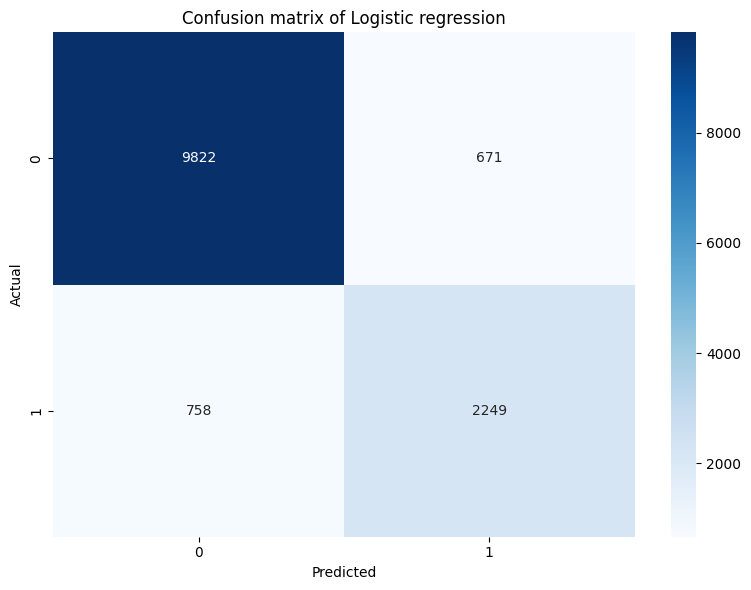

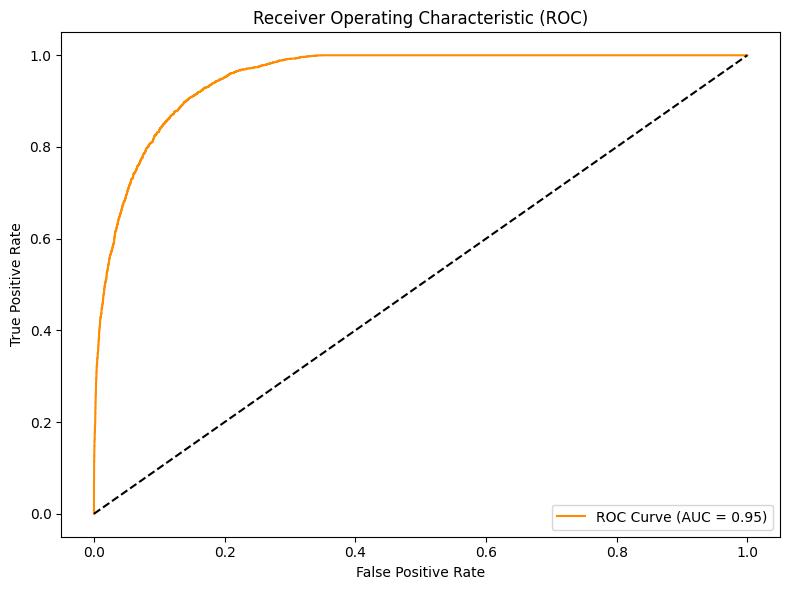

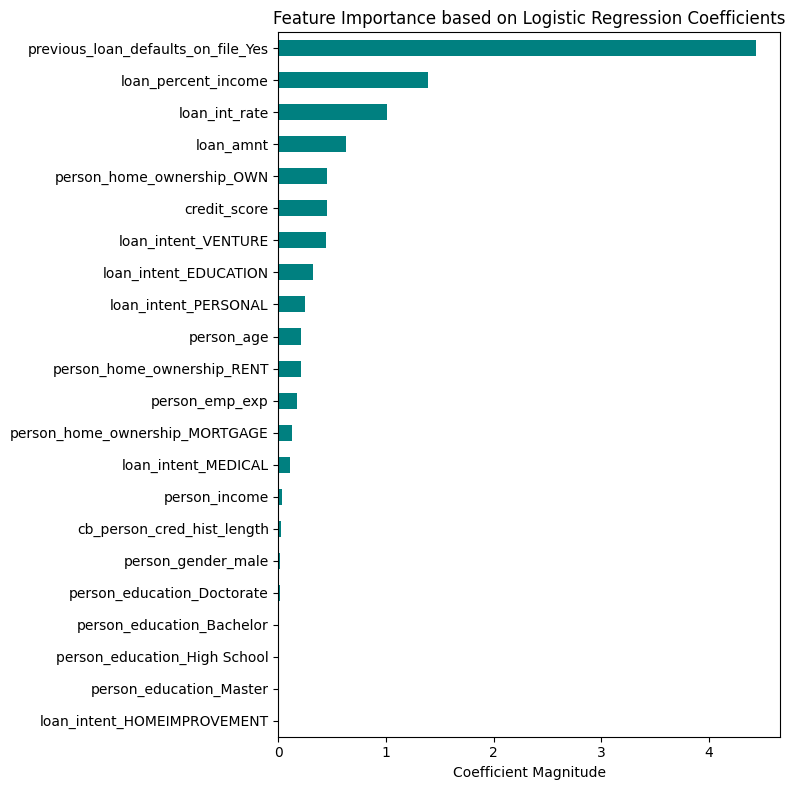

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

#Create dummy variables for categorical variables
data_encoded1 = pd.get_dummies( data, columns= ['person_gender', 'person_education', 'loan_intent', 'previous_loan_defaults_on_file'], drop_first= True ) 
data_encoded2 = pd.get_dummies( data_encoded1, columns= ['person_home_ownership'], drop_first=False) 
data_encoded = data_encoded2.drop(columns=['person_home_ownership_OTHER'], axis=1) #We want to keep the classes Mortgage, Own and Rent of this variable

#Division of features (X) and targeted variable (y)
X = data_encoded.drop(['loan_status'], axis=1)
y = data_encoded['loan_status']

#Split the data into train and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

#Scaling datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model training
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

#Prediction
lr_pred = lr.predict(X_test_scaled)

#Accuracy score
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy score:',  lr_accuracy)

#Confusion matrix
lr_confusion = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8,6))
sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix of Logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#ROC curve
lr_pred_probs = lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_probs)
lr_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {lr_roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#Features Importance in the model
coef = pd.Series(np.abs(lr.coef_[0]), index=X.columns).sort_values()
plt.figure(figsize=(8, 8))
coef.plot(kind='barh', color='teal')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

Random Forest 

Random Forest Accuracy score: 0.9271851851851852


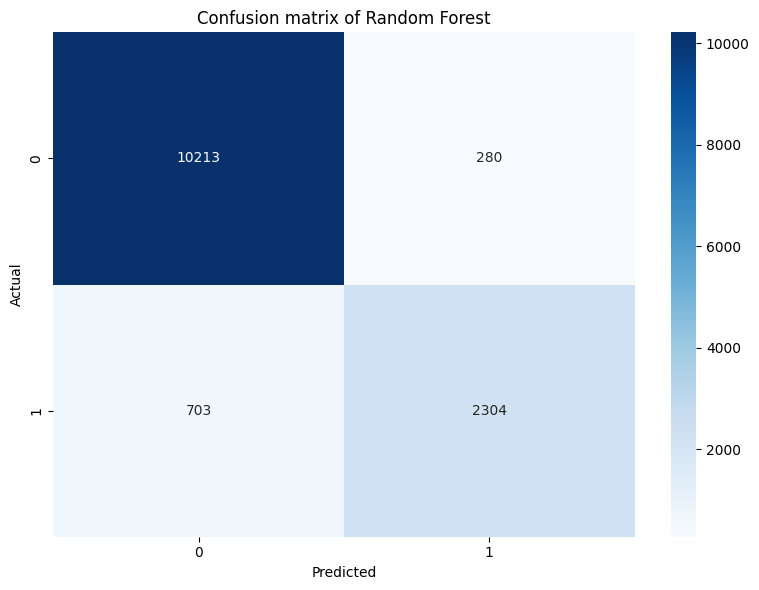

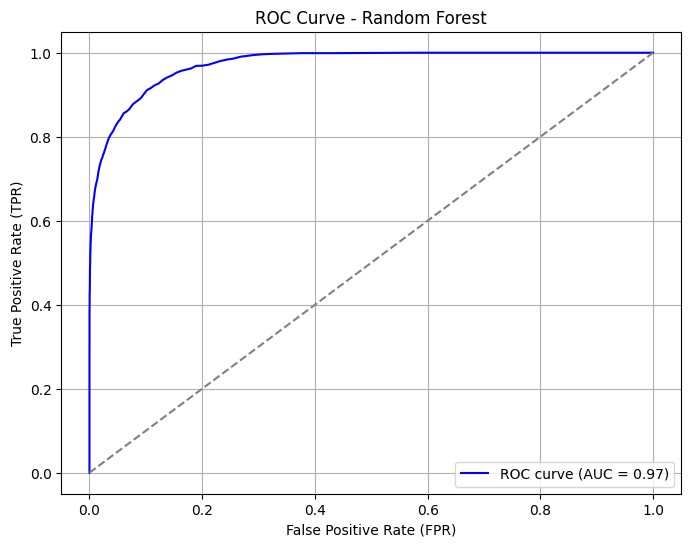

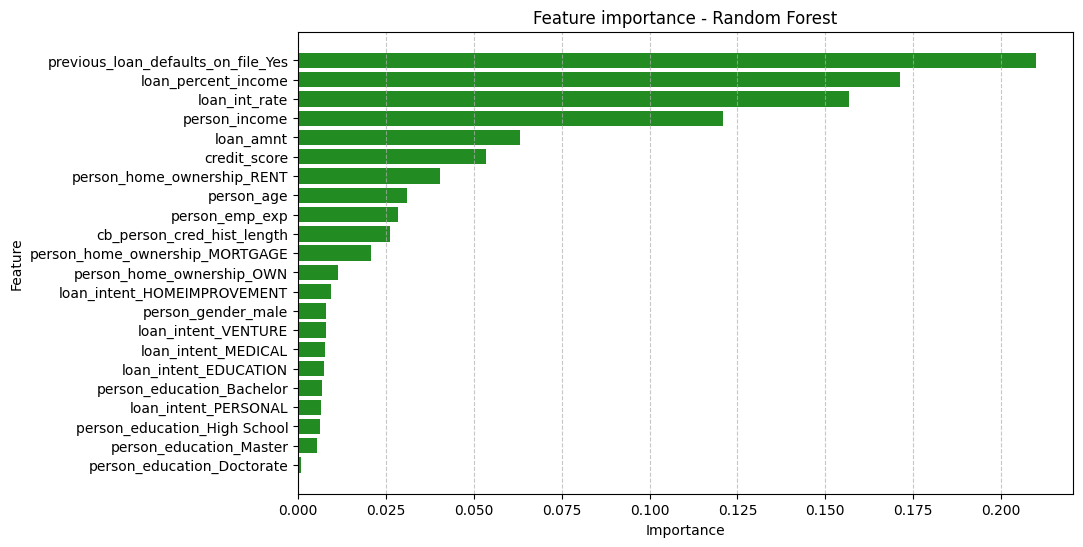

In [8]:
from sklearn.ensemble import RandomForestClassifier

#Model training
rf = RandomForestClassifier(n_estimators= 100, random_state=42)
rf.fit(X_train, y_train)

#Prediction
rf_pred = rf.predict(X_test)

#Accuracy score
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy score:',  rf_accuracy)

#Confusion matrix
rf_confusion = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#ROC Curve
rf_pred_prob = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)  
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'ROC curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#Importance of features
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importance - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The Random Forest is better, so are going to keep it.
Plus, the important feature in the model are. We are going to perform another random forest algorithm with these 10 features, to see if it's improving the model. 

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'previous_loan_defaults_on_file_Yes',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')
Random Forest Accuracy score: 0.9202962962962963


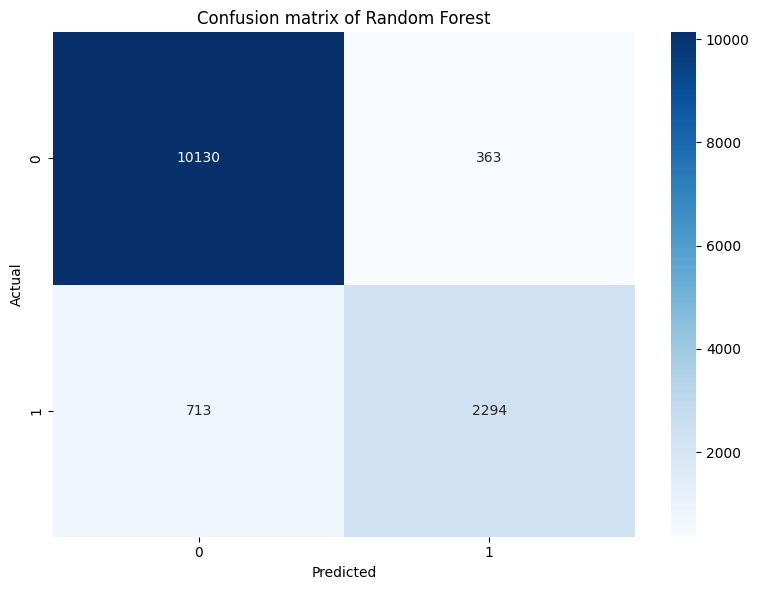

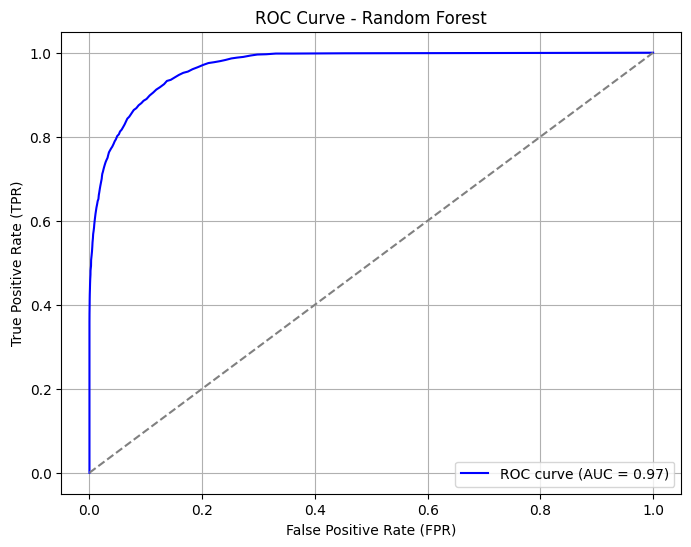

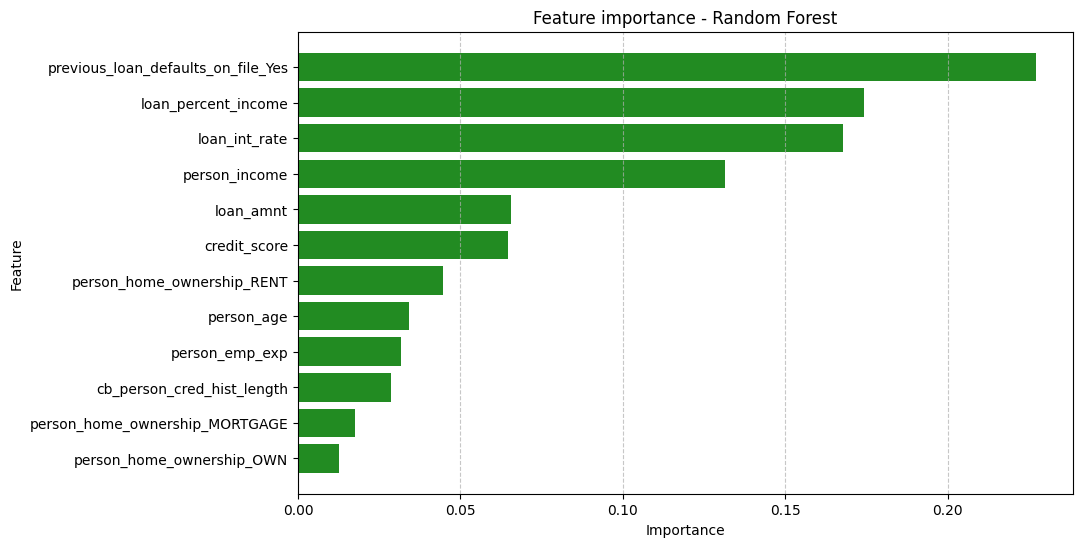

In [9]:
#Dataset with the important features
important_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','credit_score', 'loan_status', 
'previous_loan_defaults_on_file_Yes', 'person_home_ownership_MORTGAGE',
'person_home_ownership_OWN', 'person_home_ownership_RENT']
new_data= data_encoded[important_features]
print(new_data.columns)

#Division of features (A) and targeted variable (b)
A = new_data.drop(['loan_status'], axis=1)
b = new_data['loan_status']

#Split the data into train and test sets (70/30)
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size= 0.3, random_state=42)

rf2 = RandomForestClassifier(n_estimators= 100, random_state=42)
rf2.fit(A_train, b_train)

#Prediction
rf2_pred = rf2.predict(A_test)

#Accuracy score
rf2_accuracy = accuracy_score(b_test, rf2_pred)
print('Random Forest Accuracy score:',  rf2_accuracy)

#Confusion matrix
rf2_confusion = confusion_matrix(b_test, rf2_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rf2_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#ROC Curve
rf2_pred_prob = rf2.predict_proba(A_test)[:, 1]
rf2_fpr, rf2_tpr, _ = roc_curve(b_test, rf2_pred_prob)
rf2_roc_auc = auc(rf2_fpr, rf2_tpr)  
plt.figure(figsize=(8, 6))
plt.plot(rf2_fpr, rf2_tpr, color='blue', label=f'ROC curve (AUC = {rf2_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#Importance of features
feature_importance = rf2.feature_importances_
importance_df = pd.DataFrame({'Feature': A_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importance - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



The first random forest model is slightly better than the second one (0.9271 vs 0.9202). But we are going to keep the second one because it will be beneficial to us have to less features for the creation of the interactive application 

Creation of an interactive application 

In [10]:
#Model storage
import joblib 
joblib.dump(rf2, "loanRF_model.pkl")

['loanRF_model.pkl']

In [11]:
print(new_data.columns)
print(new_data.describe())

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'previous_loan_defaults_on_file_Yes',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_